## Importing Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting Data from Kaggle

In [ ]:
#loading kaggle api
! pip install -q kaggle
#uploading kaggle json
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhishekkrsingh369","key":"c7946f9e69a0164ffd136c4264617f4a"}'}

In [ ]:
#creating directory for storage
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
#giving read/write permission
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
##Requesting data from kaggle
!kaggle competitions download -c nlp-getting-started

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 115MB/s]


### Unzipping data

In [ ]:
import zipfile

In [ ]:
zip_ref = zipfile.ZipFile("/content/nlp-getting-started.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls -la

total 2020
drwxr-xr-x 1 root root   4096 Apr 27 04:01 .
drwxr-xr-x 1 root root   4096 Apr 27 03:56 ..
drwxr-xr-x 4 root root   4096 Apr 25 13:45 .config
-rw-r--r-- 1 root root     74 Apr 27 04:01 kaggle.json
-rw-r--r-- 1 root root 607343 Apr 27 04:01 nlp-getting-started.zip
drwxr-xr-x 1 root root   4096 Apr 25 13:46 sample_data
-rw-r--r-- 1 root root  22746 Apr 27 04:01 sample_submission.csv
-rw-r--r-- 1 root root 420783 Apr 27 04:01 test.csv
-rw-r--r-- 1 root root 987712 Apr 27 04:01 train.csv


## Data Preprocessing and Visualization

In [ ]:
#Converting .csv to Dataframe
train_data=pd.read_csv("/content/train.csv")
test_data=pd.read_csv("/content/test.csv")

In [ ]:
# Doing preliminary EDA 
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
# missing data count in percentage
len(train_data[train_data['keyword'].isnull()])/len(train_data)*100,len(train_data[train_data['location'].isnull()])/len(train_data)*100

(0.8012610009194797, 33.27203467752528)

In [ ]:
train_data['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [ ]:
#checking relevence between keyword and target i.e if keyword have roughly equal numbers of 0 and 1 then they do not provide any infomation
keyword_dict={}
keywords=[]
for keyword in train_data['keyword'].dropna():
    t=train_data[train_data['keyword'] == keyword]
    len1=len(t[t['target']==1])
    len2=len(t[t['target']==0])
    keyword_dict[keyword]=[len1,len2]
#sorting keyword on basis of occurence
keywords=sorted(keyword_dict.keys(),key=lambda x: (keyword_dict[x][0]+keyword_dict[x][1]),reverse=True)


In [ ]:
# printing 5 most common keywords
for i in keywords[:5]:
  print(f"{i} : disaster= {keyword_dict[i][0]} , Not Disaster= {keyword_dict[i][1]}")

fatalities : disaster= 26 , Not Disaster= 19
armageddon : disaster= 5 , Not Disaster= 37
deluge : disaster= 6 , Not Disaster= 36
body%20bags : disaster= 1 , Not Disaster= 40
damage : disaster= 19 , Not Disaster= 22


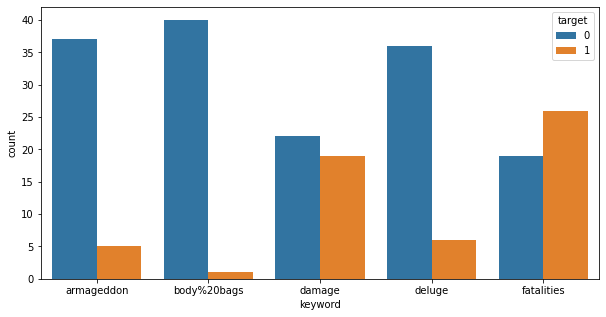

In [ ]:
#Plotting the dict
plt.figure(figsize=(10,5))
plotdict=train_data[(train_data['keyword'] ==keywords[0])|(train_data['keyword'] ==keywords[1])|(train_data['keyword'] ==keywords[2])|(train_data['keyword'] ==keywords[3])|(train_data['keyword'] ==keywords[4])]
sns.countplot(data=plotdict,x='keyword',hue='target')

In [ ]:
# getting random tweets
def tweetdisplay(df,classid):
  t=df[df['target']== classid].sample(n=1).iloc[0]
  id=t['id']
  keyword=t['keyword']
  text=t['text']
  print(f"keyword : {keyword} class : {classid}\n {text}")

In [ ]:
tweetdisplay(train_data,1)

keyword : wounds class : 1
 Gunshot wound #9 is in the bicep. The only one of the ten wounds that is not in the chest/torso area.  #KerrickTrial #JonathanFerrell


## Data Cleaning

In [ ]:
#Dropping Location
train_data.drop(['location','id'],axis=1,inplace=True)
test_data.drop(['location'],axis=1,inplace=True)
#Dropping keywords
train_data.drop(['keyword'],axis=1,inplace=True)
test_data.drop(['keyword'],axis=1,inplace=True)
train_data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))
from nltk.tokenize import RegexpTokenizer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Function for Removing Punctuation, stopwords, also replacing numbers with @ ,stemming
def rmstopwords(text):
  #words = word_tokenize(text)
  tokenizer = RegexpTokenizer(r'\w+')
  words_without_punctuation = tokenizer.tokenize(text)
  wordsFiltered =""
  for w in words_without_punctuation:
    #removing links
    if w.startswith("http"):
      continue
    if w not in stopWords:
      if w.isnumeric():
        w="@"
      wordsFiltered+=ps.stem(w.lower())+" "
  return wordsFiltered

In [ ]:
train_data['text']=train_data['text'].apply(rmstopwords)
train_data.head()

,text,target
0,our deed reason earthquak may allah forgiv us,1
1,forest fire near la rong sask canada,1
2,all resid ask shelter place notifi offic no ev...,1
3,@ @ peopl receiv wildfir evacu order california,1
4,just got sent photo rubi alaska smoke wildfir ...,1


### Deleting Cleaning and dealing with null values(For Testing only not used)

In [ ]:
# Deleting Irrevalent Data such as id and location
#train_data.drop(columns=['id','location'],axis=1,inplace=True)
#train_data.head()

In [ ]:
## getting column id from test data for submission
#test_id=test_data['id']
#test_id.head()

In [ ]:
#test_data.drop(columns=['id','location'],axis=1,inplace=True)
#test_data.head()

In [ ]:
#replacing all null values in keyword with an word having min(count 0f 0 - count of 1) to make the data unbiased
#getting the keyword with min(count 0f 0 - count of 1)
#import sys 
#replace_keyword=""
#mincount=sys.maxsize
#for keyword,values in keyword_dict.items():
#if(mincount>abs(values[0]-values[1])):
#   replace_keyword=keyword
#print(replace_keyword)
# function for replacement
#def replacement(x):
# if(pd.isnull(x)):
#   return replace_keyword
# return x

In [ ]:
#train_data['keyword']=train_data['keyword'].apply(replacement)
#train_data.info()

In [ ]:
#test_data['keyword']=test_data['keyword'].apply(replacement)
#test_data.info()

### Creating a train-validation split for training the model(not used validation baked in model training itself)

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#train_data,val_data,train_labels,val_labels=train_test_split(train_data.drop('target',axis=1),train_data['target'],test_size=0.1)


In [ ]:
#len(train_data),len(test_data),len(val_data)

## Creating a model

In [ ]:
## note if you see a warning its a tf bug of current version doesn't effect execution
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
!pip install tensorflow_text
import tensorflow_text as text
import tensorflow_hub as hub

     |████████████████████████████████| 4.9 MB 5.0 MB/s 
     |████████████████████████████████| 462 kB 70.0 MB/s 


In [ ]:
# BERT Model
base_encoder=hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/2",trainable=False)
##Preprocssor of bert
preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
#preprocessor = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

In [ ]:
#model_1
## BERT Model preprocessing layers
text_inputs = tf.keras.layers.Input(shape=(), dtype=tf.string)
encoder_inputs = preprocessor(text_inputs)
outputs = base_encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]  
x=layers.Dense(256,activation='relu')(pooled_output)
x=layers.Dense(512,activation='relu')(x)
x=layers.Dense(512,activation='relu')(x)
output=layers.Dense(1,activation='sigmoid')(x)

In [ ]:
model1=tf.keras.Model(text_inputs,output)
model1.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_mask': (Non  0           ['input_6[0][0]']                
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [ ]:
#tf.config.run_functions_eagerly(True)

In [ ]:
# Creating an early stopping callback
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
earlystop=EarlyStopping(monitor='val_accuracy',patience=3,mode='max',verbose=0,restore_best_weights=True)
#model_checkpoint_path="checkpoints/check_point1.ckpt"
#model_checkpoint=ModelCheckpoint(model_checkpoint_path,monitor='val_accuracy',verbose=0,save_best_only=True,save_weights_only=True)

In [ ]:
history=model1.fit(x=train_data['text'],y=train_data['target'],
           epochs=100,
           validation_split=0.1,
           callbacks=[earlystop],shuffle=True)

Epoch 1/100
215/215 [==============================] - 26s 89ms/step - loss: 0.5639 - accuracy: 0.7177 - val_loss: 0.5866 - val_accuracy: 0.6982
Epoch 2/100
215/215 [==============================] - 18s 85ms/step - loss: 0.5252 - accuracy: 0.7476 - val_loss: 0.5374 - val_accuracy: 0.7480
Epoch 3/100
215/215 [==============================] - 18s 85ms/step - loss: 0.5173 - accuracy: 0.7513 - val_loss: 0.5299 - val_accuracy: 0.7533
Epoch 4/100
215/215 [==============================] - 19s 88ms/step - loss: 0.5193 - accuracy: 0.7519 - val_loss: 0.5338 - val_accuracy: 0.7585
Epoch 5/100
215/215 [==============================] - 18s 86ms/step - loss: 0.5110 - accuracy: 0.7608 - val_loss: 0.5319 - val_accuracy: 0.7572
Epoch 6/100
215/215 [==============================] - 18s 85ms/step - loss: 0.5036 - accuracy: 0.7634 - val_loss: 0.5815 - val_accuracy: 0.7008
Epoch 7/100
215/215 [==============================] - 18s 86ms/step - loss: 0.4972 - accuracy: 0.7673 - val_loss: 0.5239 - val_ac

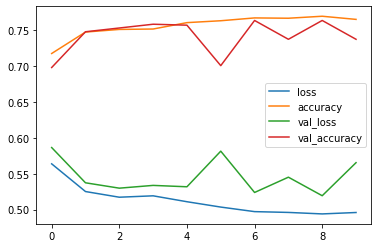

In [ ]:
plt.figure()
plt.plot(pd.DataFrame(history.history))
plt.legend(pd.DataFrame(history.history).columns)

## Getting prediction for Kaggle Submission

In [ ]:
# Data preprocessing Test data
test_data['text']=test_data['text'].apply(rmstopwords)

In [ ]:
prediction=tf.cast(tf.round(model1.predict(test_data['text'])),dtype=tf.int32)
prediction=np.array(tf.squeeze(prediction))

In [ ]:
numpy_ids=test_data['id'].to_numpy()
numpy_ids[:10]

In [ ]:
submission_df=pd.DataFrame(zip(numpy_ids,prediction),columns=['id','pred'])
submission_df.head()

In [ ]:
submission_df.to_csv('submission2.csv',header=['id','target'],index=False)

In [ ]:
!kaggle competitions submit -c nlp-getting-started -f submission2.csv -m "Bert Small Model"